In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titled_players.csv',index_col = 0)

In [3]:
new_cols = [
            'Woman Candidate Master (WCM)',
            'Candidate Master (CM)',
            'Woman FIDE Master (WFM)',
            'FIDE Master (FM)',
            'Woman International Master (WIM)',
            'International Master (IM)',
            'Woman Grandmaster (WGM)',
            'Grandmaster (GM)'
           ]

Environ 80% des joueurs ont une année d'obtention de titre

In [4]:
(df[new_cols].notnull().sum(axis=1) != 0).sum() / df.shape[0] * 100

78.90204520990312

In [5]:
df_no_year_title = df[(df[new_cols].notnull().sum(axis=1) == 0)].copy()
df_no_year_title.head()

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates,Woman Candidate Master (WCM),Candidate Master (CM),Woman FIDE Master (WFM),FIDE Master (FM),Woman International Master (WIM),International Master (IM),Woman Grandmaster (WGM),Grandmaster (GM)
2,2002310,"Levy, Louis",FM,NaN,USA,2275.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14100657,"Ousatchi, Mark",FM,NaN,GER,2157.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4103424,"Khasin, Abram",IM,NaN,RUS,2318.0,NaN,NaN,1923.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4128575,"Kukharev, Nikolay",FM,NaN,RUS,2214.0,NaN,NaN,1923.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1602470,"Nowotny, Heinz",FM,NaN,AUT,2255.0,NaN,NaN,1923.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


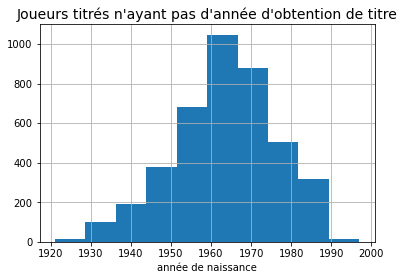

In [6]:
df_no_year_title['naissance'].hist()
plt.title("Joueurs titrés n'ayant pas d'année d'obtention de titre", size=14)
plt.xlabel('année de naissance')
plt.show()

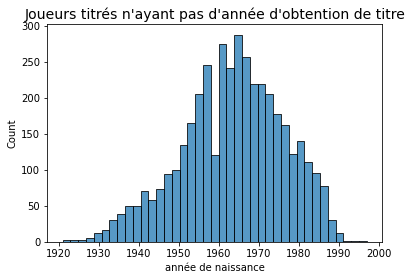

In [7]:
sns.histplot(data = df_no_year_title['naissance'])
plt.title("Joueurs titrés n'ayant pas d'année d'obtention de titre", size=14)
plt.xlabel('année de naissance')
plt.show()

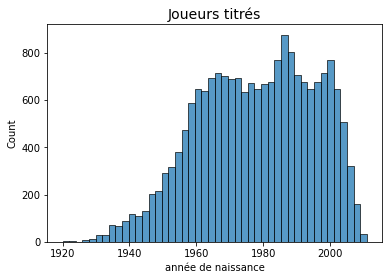

In [8]:
sns.histplot(data = df['naissance'])
plt.title("Joueurs titrés", size=14)
plt.xlabel('année de naissance')
plt.show()

In [9]:
df['classique'].isnull().sum() / df.shape[0] * 100

0.3793121123583987

In [10]:
df['rapide'].isnull().sum() / df.shape[0] * 100

39.458711363985856

In [11]:
df['blitz'].isnull().sum() / df.shape[0] * 100

38.11061561330668

In [12]:
df.pivot_table(values='classique', index='titre').sort_values(by='classique')

,classique
titre,
WCM,1671.319588
WFM,2004.880521
CM,2018.622374
WIM,2113.243081
WGM,2237.605678
FM,2240.830739
IM,2350.801598
GM,2503.067396


In [13]:
df[df['titre']== 'WFM'].head()

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates,Woman Candidate Master (WCM),Candidate Master (CM),Woman FIDE Master (WFM),FIDE Master (FM),Woman International Master (WIM),International Master (IM),Woman Grandmaster (WGM),Grandmaster (GM)
25,4149289,"Trotsenko, Evgenia",WFM,WFM,RUS,1937.0,1909.0,1840.0,1929.0,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,4145798,"Bykova, Evgeniya",WFM,WFM,RUS,1995.0,NaN,NaN,1935.0,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,4608798,"Cohn, Irina",WFM,WFM,GER,2042.0,NaN,NaN,1935.0,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,4143884,"Kiparenko, Galina",WFM,WFM,RUS,2043.0,NaN,NaN,1937.0,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,4608658,"Laakmann, Anni",WFM,WFM,GER,2185.0,NaN,NaN,1937.0,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df[(df['actif']==1) &(df['naissance']>1970)].pivot_table(values='classique', index='titre').sort_values(by='classique')

,classique
titre,
WCM,1657.839416
WFM,1981.169782
CM,2016.117845
WIM,2113.322581
WGM,2256.137255
FM,2261.469260
IM,2380.673125
GM,2535.922051


In [15]:
df[df['naissance']>1980].pivot_table(values='classique', index='titre').sort_values(by='classique')

,classique
titre,
WCM,1658.661517
CM,1989.247498
WFM,1992.245166
WIM,2123.683230
WGM,2255.276243
FM,2266.549558
IM,2391.246728
GM,2546.533416


In [16]:
df['age'] = 2021 - df['naissance']

In [17]:
df[(df['actif'] == 1) & (df['naissance']>1980)].pivot_table(values='age', index='titre').sort_values(by='age')

,age
titre,
WCM,19.352113
CM,23.381148
WFM,23.836700
FM,26.563202
WIM,26.838488
IM,28.683074
GM,30.479433
WGM,30.559055


In [18]:
rating_cols = ['classique', 'rapide', 'blitz']

In [19]:
df.describe()[rating_cols]

,classique,rapide,blitz
count,19435.000000,11811.000000,12074.000000
mean,2214.758117,2172.690797,2162.642206
std,220.446269,249.556657,252.017224
min,0.000000,1039.000000,1088.000000
25%,2123.000000,2053.000000,2037.000000
50%,2254.000000,2213.000000,2202.000000
75%,2348.000000,2331.500000,2323.000000
max,2855.000000,2842.000000,2892.000000


Il semblerait y avoir quelques valeurs aberrantes

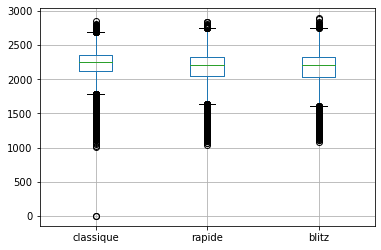

In [20]:
df.boxplot(['classique', 'rapide', 'blitz'])
plt.show()

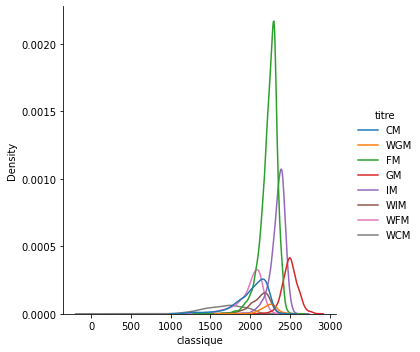

In [40]:
sns.displot(x="classique", hue='titre',data=df, kind='kde')
plt.show()

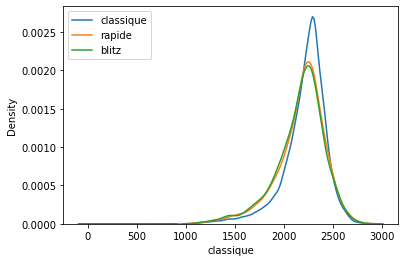

In [83]:
# fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
sns.kdeplot(x='classique', data=df, ax=ax,label='classique')
sns.kdeplot(x='rapide', data=df, ax=ax, label ='rapide')
sns.kdeplot(x='blitz', data=df, ax=ax, label='blitz')
# sns.histplot(x='rapide', data=df)
plt.legend()
plt.show()

In [91]:
for i in rating_cols:
    print(df[i].value_counts(bins=20).sort_index())
    print('\n')

(-2.856, 142.75]        2
(142.75, 285.5]         0
(285.5, 428.25]         0
(428.25, 571.0]         0
(571.0, 713.75]         0
(713.75, 856.5]         0
(856.5, 999.25]         0
(999.25, 1142.0]       14
(1142.0, 1284.75]      59
(1284.75, 1427.5]     116
(1427.5, 1570.25]     193
(1570.25, 1713.0]     307
(1713.0, 1855.75]     585
(1855.75, 1998.5]    1173
(1998.5, 2141.25]    2916
(2141.25, 2284.0]    5844
(2284.0, 2426.75]    6057
(2426.75, 2569.5]    1776
(2569.5, 2712.25]     362
(2712.25, 2855.0]      31
Name: classique, dtype: int64


(1037.196, 1129.15]      14
(1129.15, 1219.3]        18
(1219.3, 1309.45]        45
(1309.45, 1399.6]        61
(1399.6, 1489.75]        99
(1489.75, 1579.9]       130
(1579.9, 1670.05]       175
(1670.05, 1760.2]       265
(1760.2, 1850.35]       387
(1850.35, 1940.5]       599
(1940.5, 2030.65]       875
(2030.65, 2120.8]      1276
(2120.8, 2210.95]      1897
(2210.95, 2301.1]      2316
(2301.1, 2391.25]      1771
(2391.25, 2481.4]      1064


In [96]:
for i in new_cols:
    print(df[i].value_counts(bins=20).sort_index())
    print('\n')

(2003.982, 2004.85]     10
(2004.85, 2005.7]        7
(2005.7, 2006.55]        6
(2006.55, 2007.4]       19
(2007.4, 2008.25]       20
(2008.25, 2009.1]       46
(2009.1, 2009.95]        0
(2009.95, 2010.8]       72
(2010.8, 2011.65]       37
(2011.65, 2012.5]       69
(2012.5, 2013.35]       72
(2013.35, 2014.2]      182
(2014.2, 2015.05]       99
(2015.05, 2015.9]        0
(2015.9, 2016.75]      128
(2016.75, 2017.6]      136
(2017.6, 2018.45]       78
(2018.45, 2019.3]       38
(2019.3, 2020.15]       19
(2020.15, 2021.0]       13
Name: Woman Candidate Master (WCM), dtype: int64


(2000.979, 2002.0]      1
(2002.0, 2003.0]        0
(2003.0, 2004.0]       37
(2004.0, 2005.0]       22
(2005.0, 2006.0]       37
(2006.0, 2007.0]       65
(2007.0, 2008.0]       61
(2008.0, 2009.0]       72
(2009.0, 2010.0]      118
(2010.0, 2011.0]       58
(2011.0, 2012.0]      138
(2012.0, 2013.0]      169
(2013.0, 2014.0]      278
(2014.0, 2015.0]      225
(2015.0, 2016.0]      205
(2016.0, 2017.0]   

On dirait qu'il y'a eu une erreur de frappe, 2015 au lieu de 0215